📊 Exploracion inicial Proyecto Final prograII 🧠

👩🏼‍💻Sharon Obando Gómez

👨🏾‍💻Marco Alvarez Quirós

👩🏼‍💻Eunice Brenes Granados

👩🏼‍💻 Kristel Hernández Mena

📋 Descripcion del proyecto: Este proyecto propone una arquitectura modular orientada a objetos para el manejo completo del ciclo de vida de los datos y el desarrollo de modelos de aprendizaje automático. Cada módulo está representado por una clase especializada que encapsula procesos clave para Análisis y Predicción del Turismo en Costa Rica

📝 Datos/ → GestorDatos: Se encarga de administrar la carga, transformación y exportación de archivos en formatos CSV

In [ ]:
#from scr.datos.gestor_datos import GestorDatos
#Clase = GestorDatos / Instancia para cargar los datos
#turismo = GestorDatos('data/raw/turismo_anios.csv')
# Se llama al metodo de la clase para leer el archivo
#turismo.leer_archivo()


La clase GestorDatos sirve para leer un archivo CSV sin que haya problemas con el formato
Primero revisa el archivo para ver que separador usa (coma, punto y coma, etc.) y qué tipo de decimal tiene.
Despues, con esa información, carga el CSV correctamente y lo convierte en un DataFrame que se pueda usar en el analisis


⛃ Basedatos/ → GestorBaseDatos: Establece conexiones con SQLITE3 y ejecucion de consultas.


In [ ]:
from scr.basedatos.gestor_basedatos import BD

La clase BD crea y maneja una base de datos SQLite. Apenas se inicia, crea todas las tablas necesarias: paises, clima, medios de ingreso y los ingresos anuales.
Tambien tiene un metodo que, segun la latitud y longitud de un país, decide a qué continente pertenece.
Luego incluye varios métodos para llenar las tablas usando DataFrames: uno para insertar paises, otro para insertar datos de clima, otro para agregar los medios de ingreso y otro para cargar los ingresos anuales.
Ademas trae una función para limpiar un DataFrame antes de insertarlo, corrigiendo nombres de columnas y eliminando las que no sirven.
Tambien permite consultar cualquier tabla y a lo ultimo tiene un metodo para cerrar la conexion con la base de datos.


🖧 Api/ → ClienteAPI: realiza peticiones a APIs públicas y convierte las respuestas en estructuras tipo DataFrame.

In [1]:
from scr.api.api import ClienteAPI
cliente_api = ClienteAPI()
cliente_api.coordenadas_paises()
cliente_api.clima_anual(2013, lat=10, lon=-84)
cliente_api.clima_rango_anios(2013, 2024, lat=10, lon=-84)

Archivo C:\Proyecto_III_FINAL\ProyectoFinal_PrograII_SMEK\data\processed\Coordenadas_Paises.csv creado con éxito ✅
Archivo C:\Proyecto_III_FINAL\ProyectoFinal_PrograII_SMEK\data\processed\clima_anual_2013.csv creado con éxito ✅
Archivo 'C:\Proyecto_III_FINAL\ProyectoFinal_PrograII_SMEK\data\processed\clima_resumen_anual.csv' creado con éxito ✅


,year,temp_max,temp_min,rain_mm,temp_avg
0,2013,21.96,15.92,7.10,18.94
1,2014,21.75,16.04,8.07,18.90
2,2015,21.97,16.34,6.51,19.15
3,2016,22.20,16.52,8.06,19.36
4,2017,22.51,15.50,7.26,19.01
5,2018,22.24,15.22,5.17,18.73
6,2019,22.85,15.49,5.26,19.17
7,2020,22.69,15.52,7.93,19.11
8,2021,22.41,15.22,6.19,18.81
9,2022,22.36,15.05,7.19,18.70


Documentacion relacionada con dicha clase ClienteAPI:
Se puede observar las fechas por año, la temperatura maxima, temperatura minima, temperatura promedio y la lluvia por milimetros

🛠️ Eda/ → ProcesadorEDA: Lleva a cabo análisis exploratorio de datos, limpieza y estadística descriptiva inicial.


In [4]:
from scr.eda.procesador_eda import ProcesadorEDA as eda
eda_turismo = eda(turismo.df)
eda_turismo.ejecutar_eda('turismo_anios_clean.csv')
eda_zonas = eda(zonas.df)
eda_zonas.ejecutar_eda('zonas_aereas_clean.csv')

Documentacion relacionada con dicha clase ProcesadorEDA: El proceso EDA donde se muestra toda la informacion, se hace limpieza de textos y columnas, encuentra e imputa valores nulos, elimina datos duplicados, hace una correcion de la columna ANNIOS del CSV turismo y guarda los csv con los respectivos cambios.

📊 Visualizacion/ → Visualizador: genera representaciones gráficas (líneas, barras, mapas, heatmaps, etc.) para facilitar la interpretación.

2025-12-10 12:02:20.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


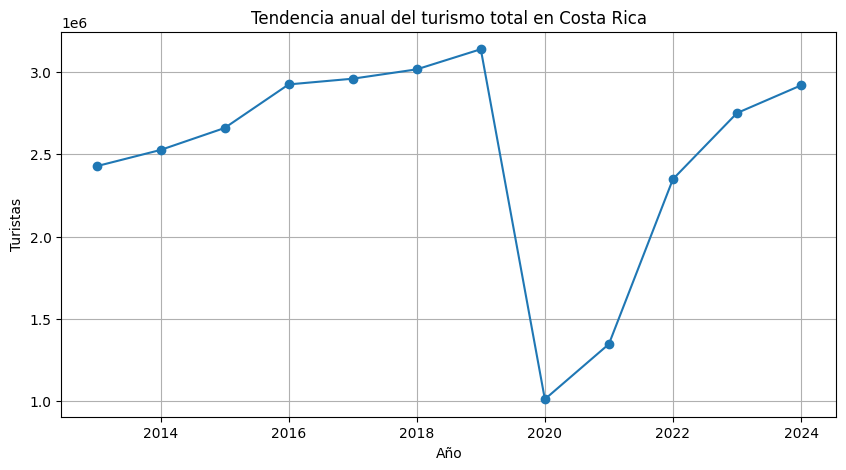

In [1]:
from scr.visualizacion.visualizador import visualizador
ruta_mapa2 = r"..\data\processed\turismo_anios_clean.csv"
viz_mapa_02 = visualizador(ruta_mapa2)
viz_mapa_02.grafico_tendencia_total()

Como podemos observar en el gráfico, este nos muestra la tendencia del turismo en Costa Rica entre los años 2013-2024. Se puede notar un aumento en la cantidad de turistas, en el año 2019, con más de 3 millones de visitas, siendo este el año con mayor llegada de turistas al país. Podriamos decir que se debe a varios factores, como precios más accesibles, una mayor promoción turística y la atracción natural que siempre a caracterizado a Costa Rica.

Por otro lado, en el 2020 se puede observar una caída muy fuerte en el turismo, siendo el año con menos visitantes. Esto se debe principalmente a la pandemia, la cual afectó directamente los viajes y el turismo a nivel mundial.

Después del 2020, podemos notar que el número de turistas empieza a recuperarse poco a poco, aunque el crecimiento es lento y no ha logrado alcanzar nuevamente los niveles que se tenían antes de la pandemia.

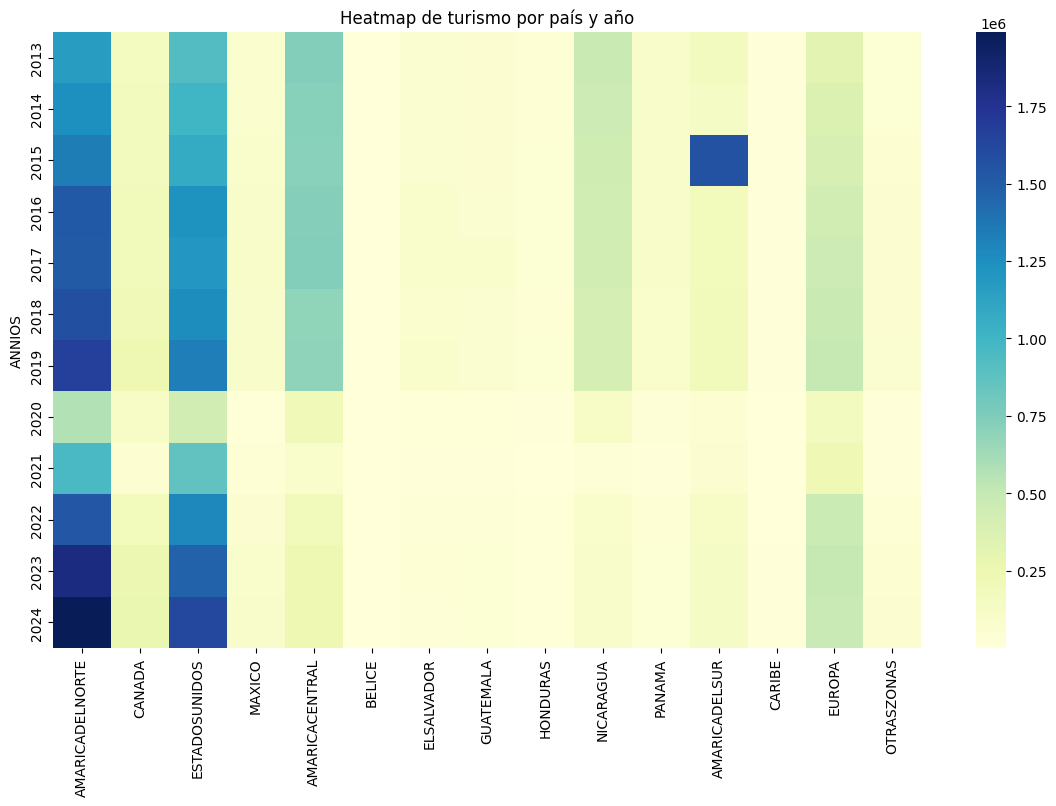

In [6]:
#heatmap_paises
ruta_mapa3= r"..\data\processed\turismo_anios_clean.csv"
viz_mapa_03 = visualizador(ruta_mapa3)
viz_mapa_03.heatmap_paises()

En este mapa de calor podemos observar la cantidad de turistas que llegaron a Costa Rica según el país o la región y el año (2013-2024). Los colores más oscuros representan una mayor cantidad de turistas, mientras que los más claros indican una menor cantidad.

Se nota claramente que América del Norte especificamente EEUU es el principal país que nos aporta más turistas durante casi todos los años, especialmente entre 2016-2019-2024, donde los colores son más intensos. Esto nos puede estar representando que EEUU han sido el país más importante para el turismo del país.

En el año 2020 se observa una disminución fuerte en casi todas las regiones, lo cual coincide con la pandemia, que afectó los viajes internacionales y redujo el turismo.

A partir de 2021, los colores comienzan a intensificarse nuevamente, lo que indica una recuperación gradual del turismo, aunque no todas las regiones se recuperan al mismo ritmo. Algunas, como Europa y América Central, muestran un crecimiento más lento en comparación con EEUU.

Este gráfico de barras nos visualiza las zonas en las cuales los turistas entran a Costa Rica: Aeropuertos, Terrestre y Maritima.

[<Figure size 1000x700 with 1 Axes>,
 <Figure size 1000x700 with 1 Axes>,
 <Figure size 1000x700 with 1 Axes>,
 <Figure size 1000x700 with 1 Axes>,
 <Figure size 1000x700 with 1 Axes>]

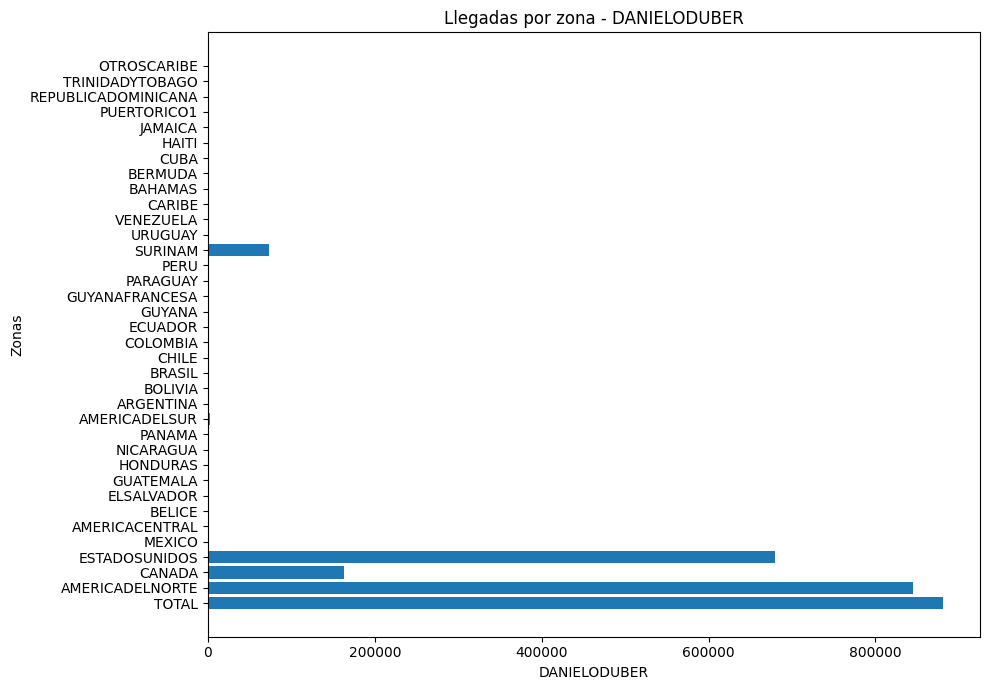

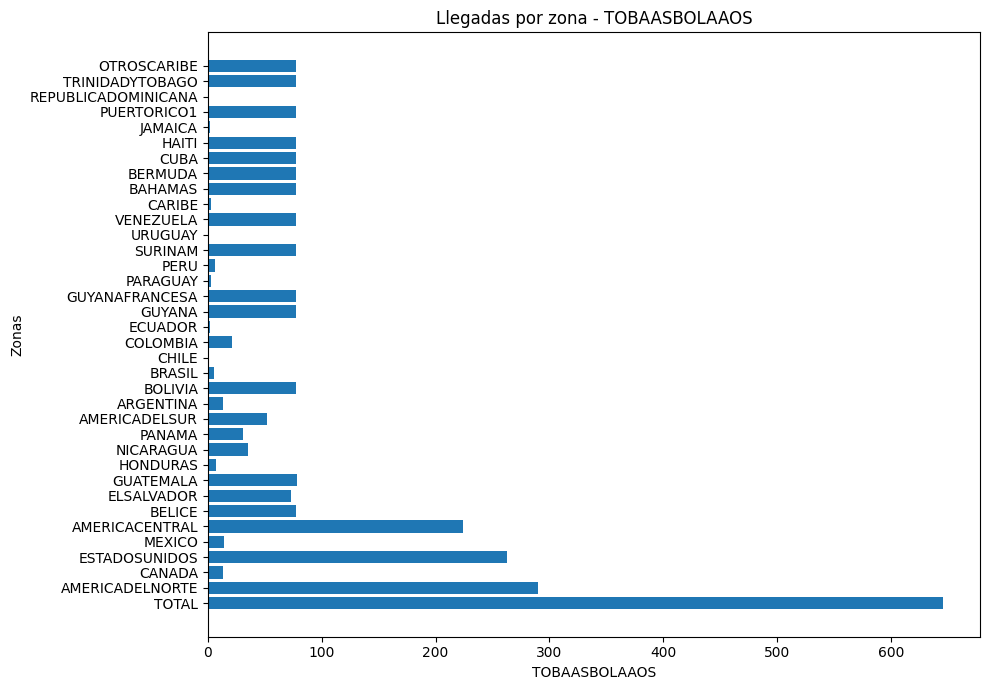

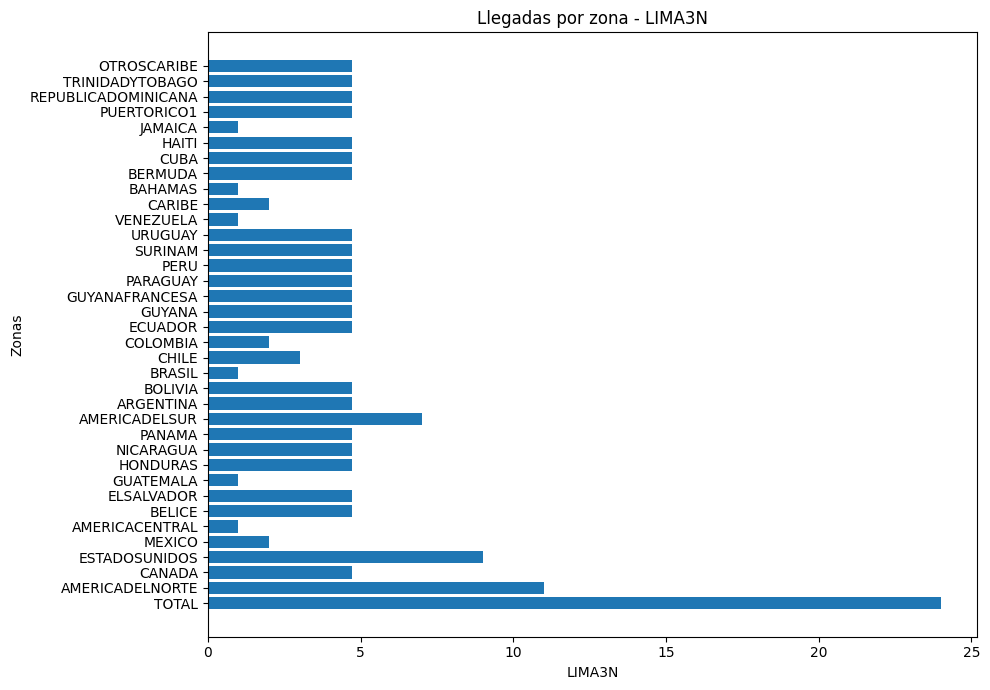

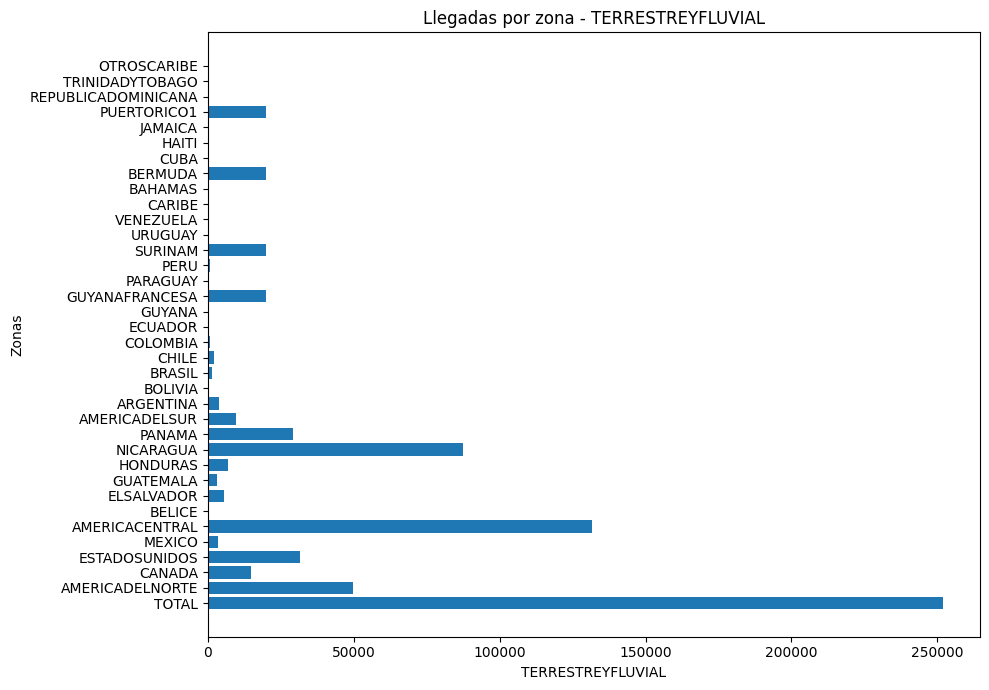

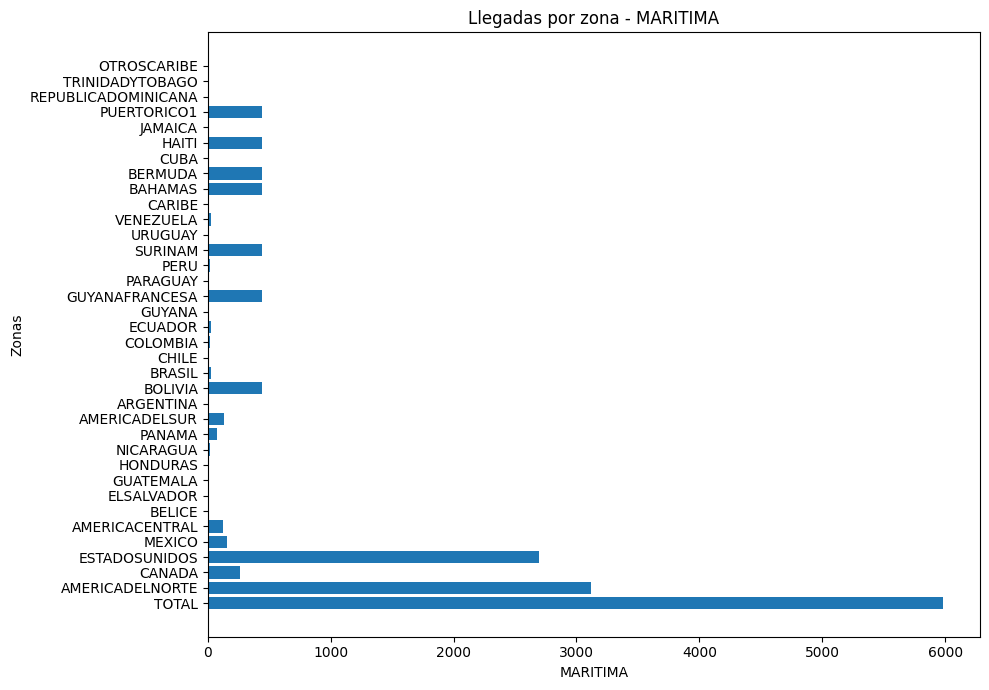

In [7]:
#grafico de barras
ruta = r"..\data\processed\zonas_aereas_clean.csv"
viz = visualizador(ruta)
viz.generar_barras_automaticas()

Y como ultimo gráfico tenemos el Mapa pero este se visualiza mejor por Streamlit - Dashboard

In [8]:
!streamlit run ../dashboard/app.py

^C


🤖 Modelos/ → ModeloML: entrena y evalúa modelos supervisados de regresión y clasificación



In [6]:
from scr.modelos.modelo_ml import ModeloML

## La clase ModeloML


#### Requiere las siguientes librerias

from sklearn.model_selection import train_test_split        # divide datos

from sklearn.metrics import mean_squared_error              # calcula errores

from sklearn.linear_model import LinearRegression           # modelo regresión lineal

from sklearn.neighbors import KNeighborsRegressor           # modelo KNN

from sklearn.ensemble import RandomForestRegressor          # modelo Random Forest


### Contiene la siguiente estructura:

### __init__(self, df, columna_objetivo)

 Parametros:

 df:requiere de un dataframe para poder analizarlo y predecir luego

 Columna objetivo: Sera la columna con la que vamos a trabajar

### preparar_datos(self)

X = self.df.drop(columns=[self.columna_objetivo])

y = self.df[self.columna_objetivo]

rain_test_split(X, y, test_size=0.2, random_state=42)

Nos permite preparar los datos creando X=Df sin la columna objetivo y Y=Obteniendo la columna objetivo de esta forma dividimos en ambiente de prueba y entrenamiendo 80/20

### def entrenar_todos(self)

El metodo que entrena todos los modelos supervisados con fin devolver los resultados de todos los modelos evaluados.

### def entrenar(self)

Crea la instancia del modelo de regresion lineal y devuelve el modelo entrenado listo y errores de evaluacion

### def predecir(self, nuevos_valores)

Predeci dentro de la clase, crea un nuevo df donde se guardaran los valores para la prediccion,recorre las columnas y las agrega al df nuevo con valores en 0 y 1.

Usa el modelo para predecir sobre "df nuevo"

### Datos entrada:

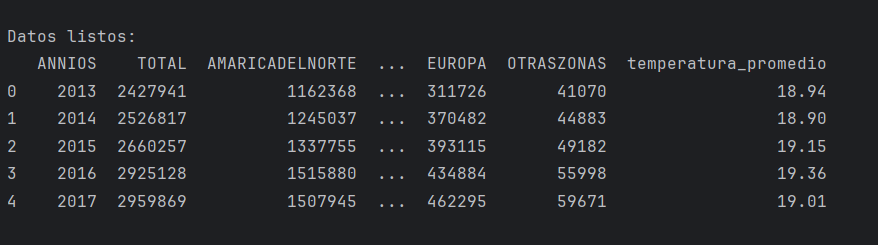

### Datos salida:


RESULTADOS

Porcentaje precision del modelo

*Regresion_Lineal: 708520219.0946405
*KNN: 224242198623.1851
*Random_Forest: 7606631780.4377775

Modelo Regresion_Lineal
Predicción total de turistas en el año 2025: 2,669,363